In [1]:
import sklearn
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [2]:
df = pd.read_csv("hw5_treasury yield curve data.csv")


In [3]:
df.head()

,Date,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
0,5/17/2019,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,...,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458,10.130177
1,5/16/2019,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,...,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636,10.130177
2,5/15/2019,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,...,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257,10.150118
3,5/14/2019,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,...,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113,10.130177
4,5/13/2019,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,...,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525,10.130177


In [4]:
df = df.drop(["Date"],axis =1)


In [5]:
# Summary statistics of the dataset

df.describe()


,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
count,8353.000000,8353.000000,8353.000000,8353.000000,8353.00000,8353.000000,8353.000000,8353.000000,8353.000000,8353.000000,...,8353.000000,8353.000000,8353.000000,8353.000000,8353.000000,8353.000000,8353.000000,8353.000000,8353.000000,8071.000000
mean,3.895104,4.371348,4.779336,5.128279,5.42020,5.657948,5.845959,5.989599,6.094526,6.166257,...,5.808739,5.743881,5.678833,5.614071,5.549984,5.486883,5.425019,5.364587,5.305740,5.509793
std,2.671616,2.531630,2.379307,2.260085,2.17498,2.116034,2.074912,2.045118,2.022213,2.003407,...,1.889966,1.891488,1.895394,1.901730,1.910500,1.921662,1.935136,1.950811,1.968547,2.491110
min,0.072700,0.327300,0.630300,1.013000,1.42450,1.698200,1.807300,1.885000,1.942100,1.988200,...,1.489600,1.283000,1.100800,0.941000,0.801800,0.681200,0.577100,0.487600,0.411100,2.801050
25%,1.220600,1.923100,2.619300,3.076300,3.66070,4.214400,4.510300,4.711300,4.851600,4.928000,...,4.220400,4.124900,4.048100,4.008700,3.987100,3.920400,3.875100,3.856100,3.858000,3.130587
50%,4.126300,4.501300,4.635400,4.873300,5.17140,5.496900,5.756000,5.931500,6.057000,6.148100,...,5.662900,5.541000,5.427100,5.293800,5.164400,5.049500,4.933400,4.823600,4.725400,4.956219
75%,6.063800,6.453800,6.700200,6.920700,7.11000,7.331200,7.519800,7.634300,7.720400,7.797700,...,7.518200,7.447200,7.365600,7.278900,7.202100,7.108300,7.004200,6.909500,6.832000,8.051437
max,9.813800,9.887800,10.145600,10.459900,10.64990,10.741400,10.766300,10.747500,10.701500,10.725100,...,11.324200,11.356900,11.386200,11.412200,11.435300,11.455600,11.473300,11.488800,11.502300,10.150118


In [6]:
df.isnull().describe() 


,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
count,8635,8635,8635,8635,8635,8635,8635,8635,8635,8635,...,8635,8635,8635,8635,8635,8635,8635,8635,8635,8635
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,8353,8353,8353,8353,8353,8353,8353,8353,8353,8353,...,8353,8353,8353,8353,8353,8353,8353,8353,8353,8071


In [7]:
df.head()


,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
0,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,2.8054,...,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458,10.130177
1,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,2.8247,...,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636,10.130177
2,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,2.7951,...,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257,10.150118
3,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,2.8289,...,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113,10.130177
4,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,2.8029,...,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525,10.130177


In [8]:
X = df.drop(["Adj_Close"], axis = 1)
y = df["Adj_Close"]

In [9]:
X.head()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF21,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30
0,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,2.8054,...,3.2840,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458
1,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,2.8247,...,3.3063,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636
2,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,2.7951,...,3.3089,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257
3,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,2.8289,...,3.3396,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113
4,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,2.8029,...,3.3192,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525


In [10]:
y.head()

0    10.130177
1    10.130177
2    10.150118
3    10.130177
4    10.130177
Name: Adj_Close, dtype: float64

In [11]:
X.shape

(8635, 30)

In [12]:
y.shape

(8635,)

In [13]:
df.dtypes


SVENF01      float64
SVENF02      float64
SVENF03      float64
SVENF04      float64
SVENF05      float64
SVENF06      float64
SVENF07      float64
SVENF08      float64
SVENF09      float64
SVENF10      float64
SVENF11      float64
SVENF12      float64
SVENF13      float64
SVENF14      float64
SVENF15      float64
SVENF16      float64
SVENF17      float64
SVENF18      float64
SVENF19      float64
SVENF20      float64
SVENF21      float64
SVENF22      float64
SVENF23      float64
SVENF24      float64
SVENF25      float64
SVENF26      float64
SVENF27      float64
SVENF28      float64
SVENF29      float64
SVENF30      float64
Adj_Close    float64
dtype: object

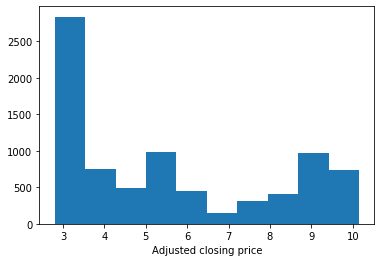

In [18]:
plt.hist(y)
plt.xlabel("Adjusted closing price")
plt.show()


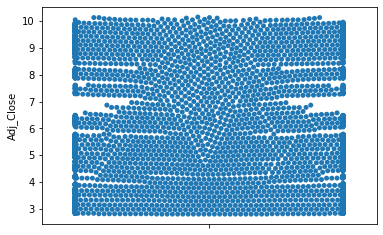

In [20]:
# Plotting Bee Swarm plot of Adjusted closing price

sns.swarmplot(y = "Adj_Close", data = df)

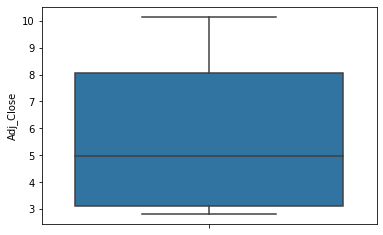

In [21]:
# Box plot of Adj. closing price

sns.boxplot(y = "Adj_Close",data = df)


In [23]:
print("skewness of Adj_Close: ",y.skew())


skewness of Adj_Close:  0.5159418751693486


In [24]:
print("kurtosis of Adj_Close: ",y.kurt())


kurtosis of Adj_Close:  -1.282388804714786


In [29]:
# Correlation heat map
a = df.columns
print(a)

Index(['SVENF01', 'SVENF02', 'SVENF03', 'SVENF04', 'SVENF05', 'SVENF06',
       'SVENF07', 'SVENF08', 'SVENF09', 'SVENF10', 'SVENF11', 'SVENF12',
       'SVENF13', 'SVENF14', 'SVENF15', 'SVENF16', 'SVENF17', 'SVENF18',
       'SVENF19', 'SVENF20', 'SVENF21', 'SVENF22', 'SVENF23', 'SVENF24',
       'SVENF25', 'SVENF26', 'SVENF27', 'SVENF28', 'SVENF29', 'SVENF30',
       'Adj_Close'],
      dtype='object')


In [30]:
type(a)


pandas.core.indexes.base.Index

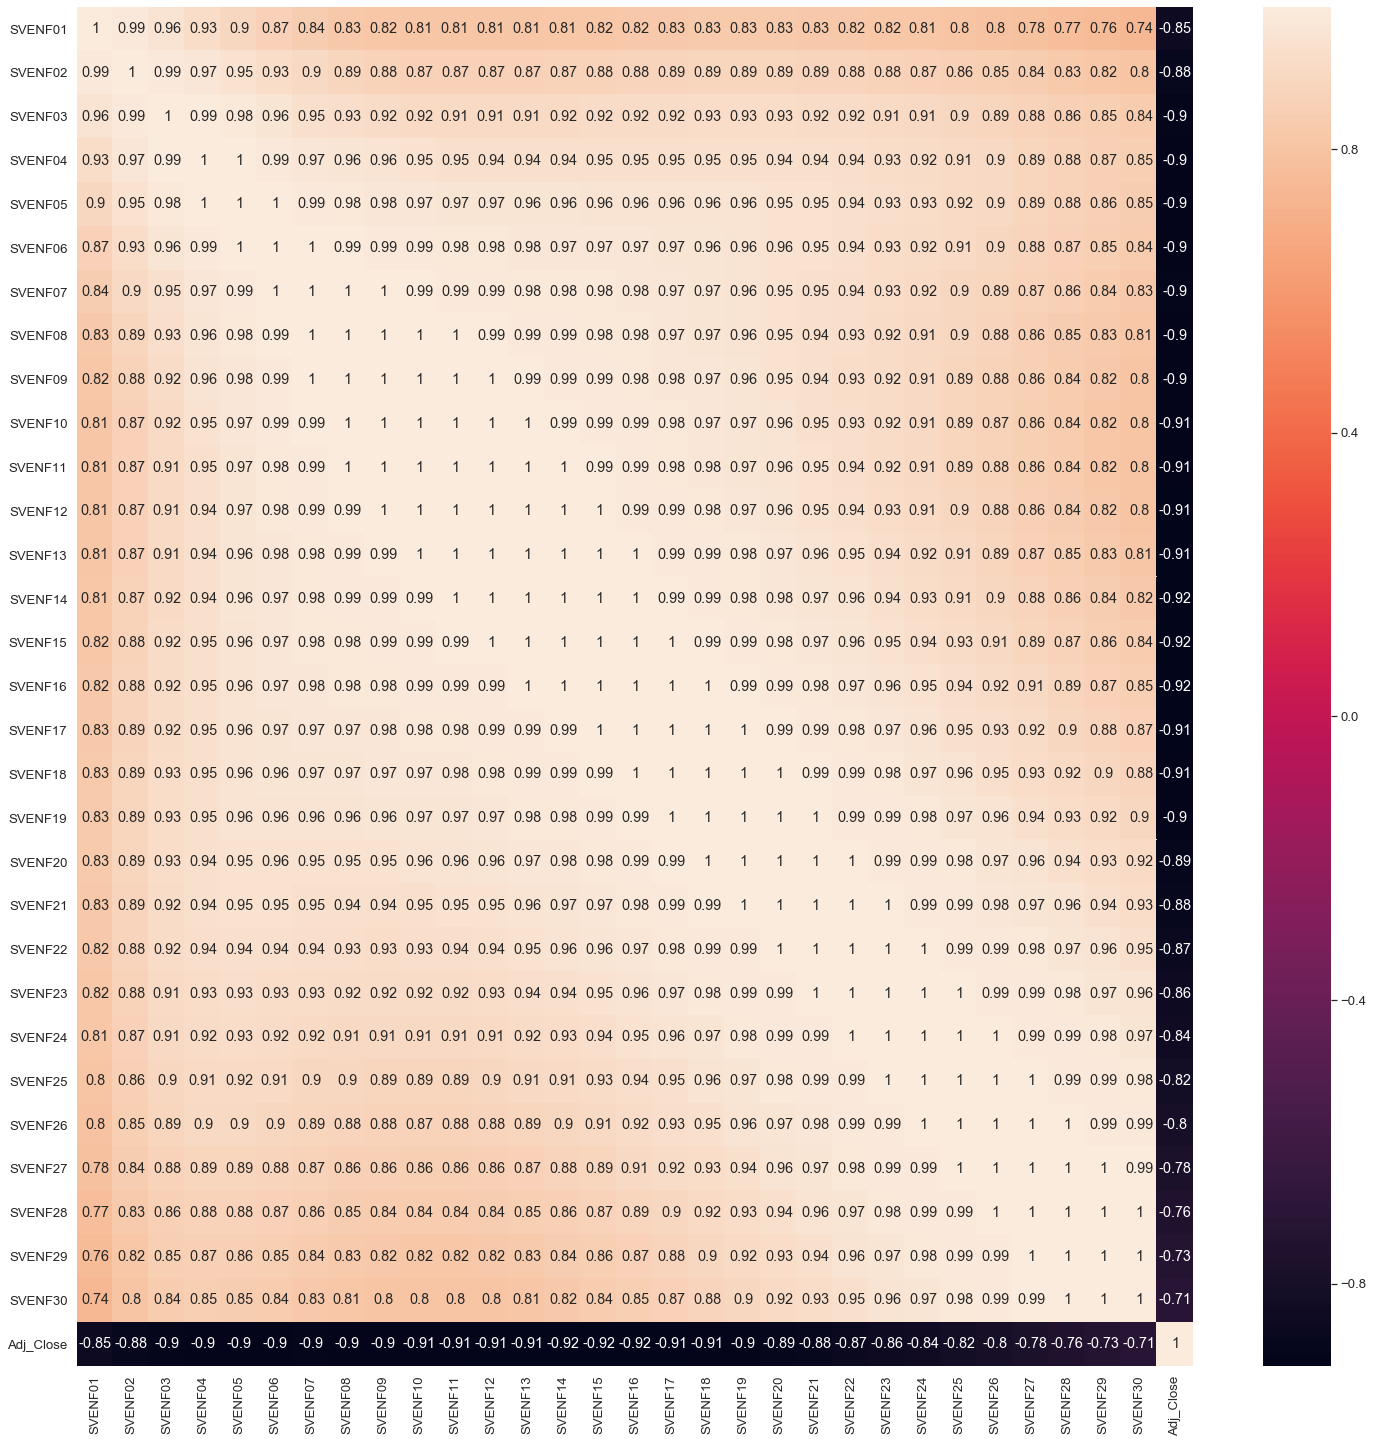

In [33]:
corr_mat = pd.DataFrame(df.corr())
sns.set(font_scale = 1.2)
fig, ax = plt.subplots(figsize=(25,25)) 
heat_map = sns.heatmap(corr_mat, 
                       annot=True, 
                      yticklabels=a,
                      xticklabels=a)
plt.show()

In [34]:
# Correlation matrix

print(df.corr)

<bound method DataFrame.corr of       SVENF01  SVENF02  SVENF03  SVENF04  SVENF05  SVENF06  SVENF07  SVENF08  \
0      2.1224   2.0266   2.1023   2.2377   2.3790   2.5042   2.6069   2.6885   
1      2.1239   2.0317   2.1096   2.2468   2.3901   2.5171   2.6217   2.7049   
2      2.0874   1.9956   2.0844   2.2289   2.3736   2.4980   2.5984   2.6779   
3      2.1319   2.0559   2.1451   2.2856   2.4257   2.5461   2.6428   2.7188   
4      2.1051   2.0234   2.1180   2.2632   2.4051   2.5248   2.6198   2.6940   
5      2.2026   2.1401   2.2178   2.3423   2.4690   2.5800   2.6708   2.7431   
6      2.2054   2.1331   2.1960   2.3105   2.4338   2.5467   2.6426   2.7214   
7      2.2397   2.1810   2.2434   2.3535   2.4727   2.5827   2.6767   2.7541   
8      2.2251   2.1480   2.1984   2.3030   2.4216   2.5343   2.6328   2.7151   
9      2.2579   2.1983   2.2551   2.3617   2.4811   2.5944   2.6935   2.7763   
10     2.2894   2.2417   2.2964   2.3968   2.5102   2.6191   2.7156   2.7970   
11     2

In [40]:
df_subset = df[['SVENF01','SVENF03','SVENF06','SVENF10','SVENF15','SVENF20','SVENF25','SVENF27','SVENF30','Adj_Close']]

In [41]:
df_subset 

,SVENF01,SVENF03,SVENF06,SVENF10,SVENF15,SVENF20,SVENF25,SVENF27,SVENF30,Adj_Close
0,2.1224,2.1023,2.5042,2.8054,3.0063,3.2335,3.4925,3.5962,3.7458,10.130177
1,2.1239,2.1096,2.5171,2.8247,3.0291,3.2561,3.5130,3.6156,3.7636,10.130177
2,2.0874,2.0844,2.4980,2.7951,3.0173,3.2587,3.5055,3.5980,3.7257,10.150118
3,2.1319,2.1451,2.5461,2.8289,3.0386,3.2858,3.5568,3.6622,3.8113,10.130177
4,2.1051,2.1180,2.5248,2.8029,3.0195,3.2672,3.5234,3.6196,3.7525,10.130177
5,2.2026,2.2178,2.5800,2.8489,3.0489,3.2902,3.5665,3.6771,3.8363,10.110235
6,2.2054,2.1960,2.5467,2.8390,3.0466,3.2793,3.5513,3.6628,3.8262,10.100265
7,2.2397,2.2434,2.5827,2.8686,3.0612,3.2807,3.5540,3.6705,3.8454,10.090294
8,2.2251,2.1984,2.5343,2.8382,3.0358,3.2465,3.5123,3.6276,3.8029,10.110235
9,2.2579,2.2551,2.5944,2.8995,3.0887,3.2877,3.5500,3.6671,3.8483,10.090294


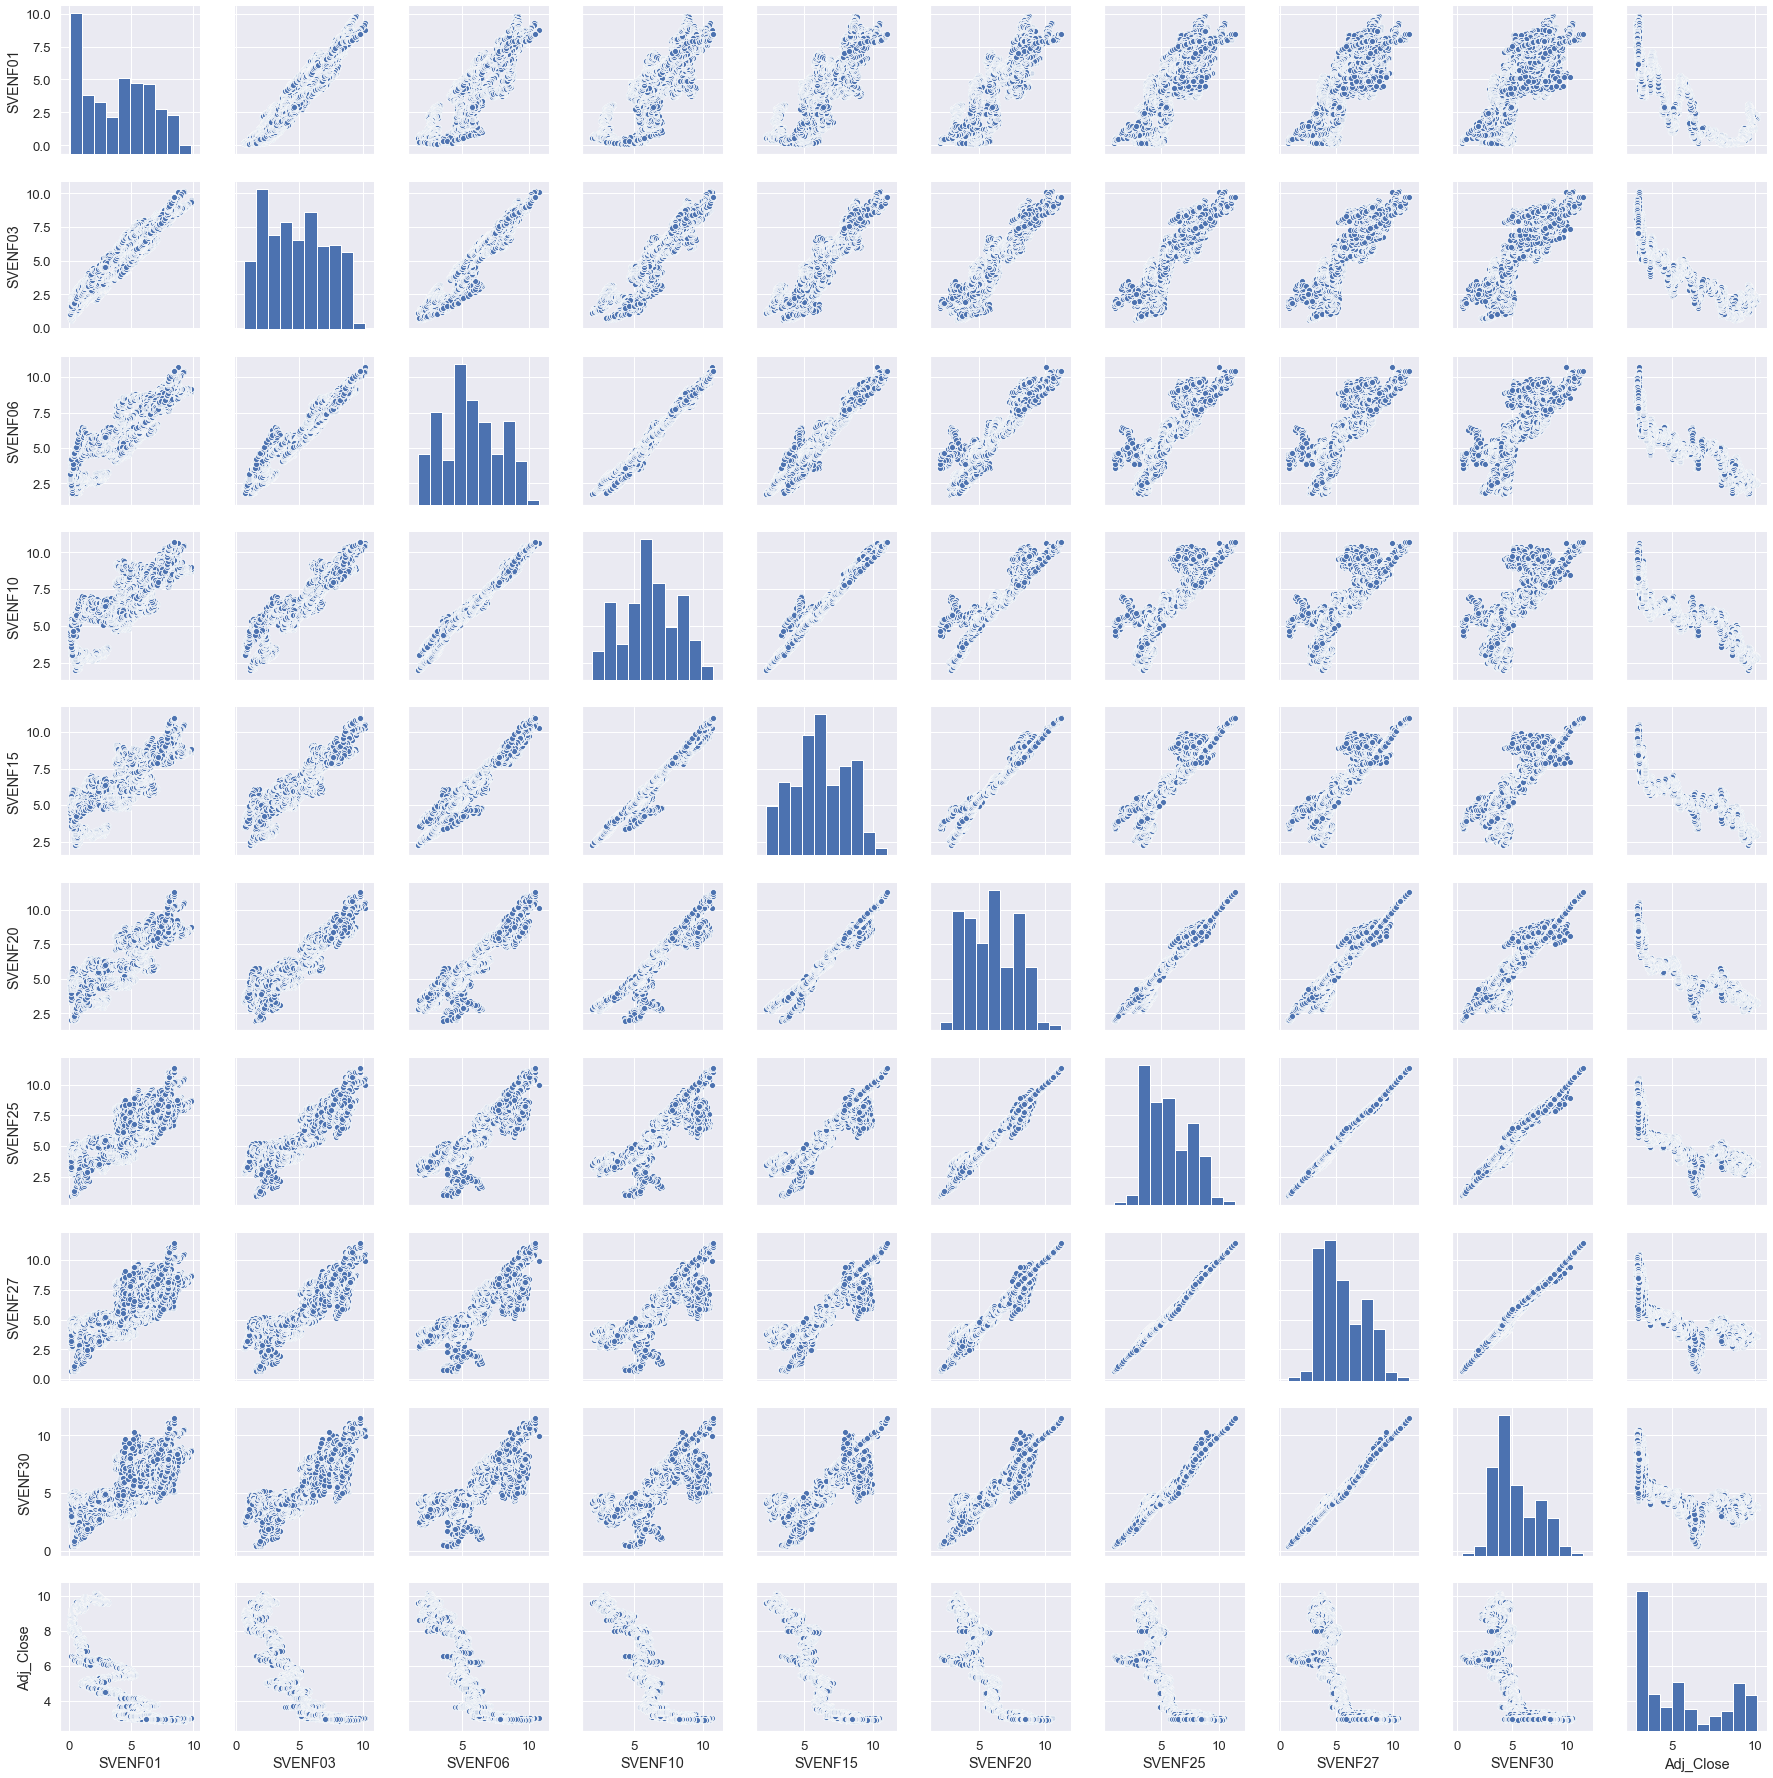

In [45]:
sns.pairplot(df_subset, height = 2.5)
plt.show()

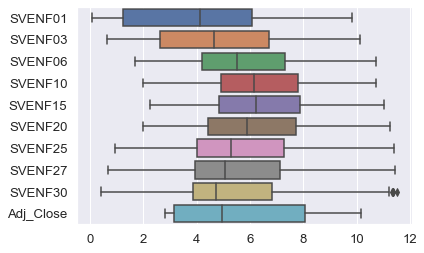

In [46]:
sns.boxplot(data = df_subset, orient = 'h')

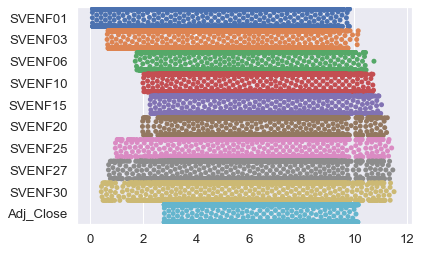

In [49]:
sns.swarmplot(data = df_subset, orient = 'h')